In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
# Load MNIST dataset
print("Loading MNIST dataset...")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"Original training data shape: {x_train.shape}")
print(f"Original training labels shape: {y_train.shape}")
print(f"Original test data shape: {x_test.shape}")
print(f"Original test labels shape: {y_test.shape}")
print(f"Data type: {x_train.dtype}")
print(f"Pixel value range: [{x_train.min()}, {x_train.max()}]")

Loading MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Original training data shape: (60000, 28, 28)
Original training labels shape: (60000,)
Original test data shape: (10000, 28, 28)
Original test labels shape: (10000,)
Data type: uint8
Pixel value range: [0, 255]
Original training data shape: (60000, 28, 28)
Original training labels shape: (60000,)
Original test data shape: (10000, 28, 28)
Original test labels shape: (10000,)
Data type: uint8
Pixel value range: [0, 255]


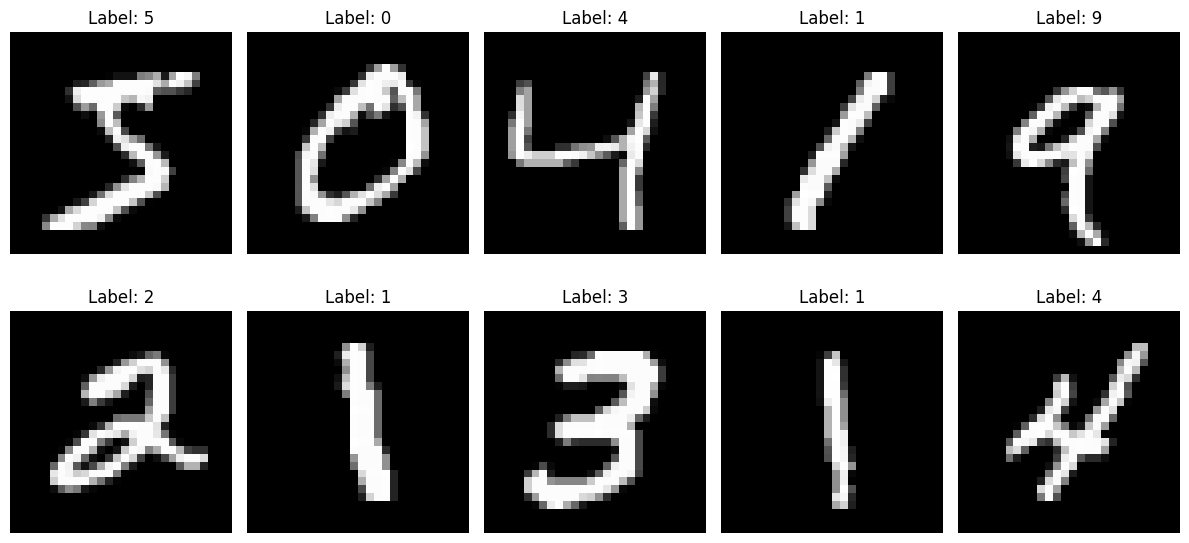

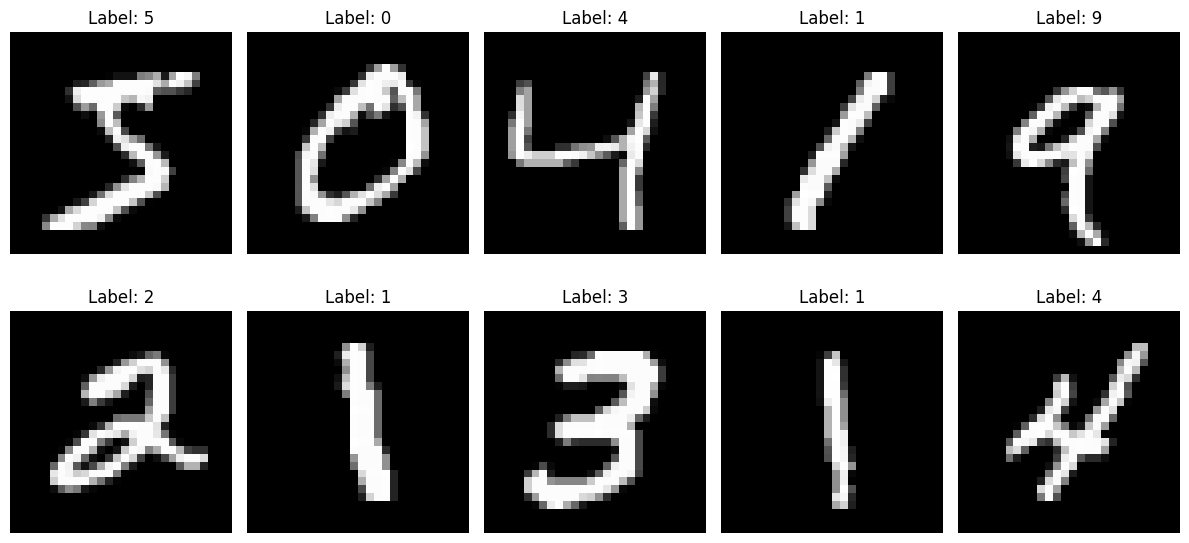

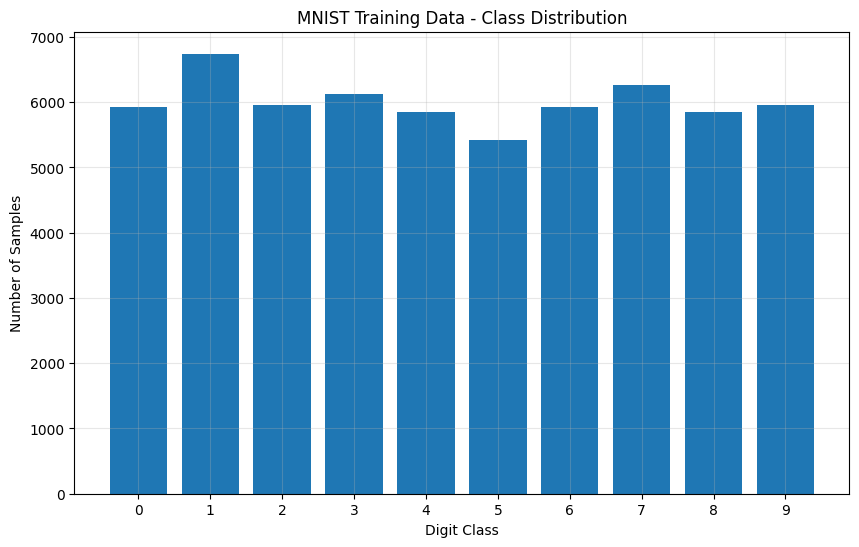

In [4]:
# Visualize some sample images
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Display class distribution
unique, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(10, 6))
plt.bar(unique, counts)
plt.xlabel('Digit Class')
plt.ylabel('Number of Samples')
plt.title('MNIST Training Data - Class Distribution')
plt.xticks(unique)
plt.grid(True, alpha=0.3)
plt.show()

## Data Preprocessing

Before splitting, let's normalize the data and combine training and test sets for a more balanced split.

In [6]:
# Normalize pixel values to [0, 1] range
x_train_norm = x_train.astype('float32') / 255.0
x_test_norm = x_test.astype('float32') / 255.0

# Combine training and test data for balanced splitting
x_combined = np.concatenate([x_train_norm, x_test_norm], axis=0)
y_combined = np.concatenate([y_train, y_test], axis=0)

print(f"Combined data shape: {x_combined.shape}")
print(f"Combined labels shape: {y_combined.shape}")

# Shuffle the combined data
from sklearn.utils import shuffle
x_combined, y_combined = shuffle(x_combined, y_combined, random_state=42)
print("Data shuffled successfully!")

Combined data shape: (70000, 28, 28)
Combined labels shape: (70000,)
Data shuffled successfully!
Data shuffled successfully!


## Split Dataset into Two Parts

Now we'll split the combined dataset into two equal parts, and then create training/testing splits for each part maintaining the original MNIST ratio (60,000 train / 10,000 test = 6:1 ratio).

In [ ]:
# First, split the combined dataset into two equal parts
from sklearn.model_selection import train_test_split

# Split into two equal parts (50% each) maintaining class distribution
x_part1_all, x_part2_all, y_part1_all, y_part2_all = train_test_split(
    x_combined, y_combined, 
    test_size=0.5, 
    stratify=y_combined, 
    random_state=42
)

print("Initial split completed!")
print(f"Part 1 total samples: {x_part1_all.shape[0]}")
print(f"Part 2 total samples: {x_part2_all.shape[0]}")

# Calculate train/test ratio from original MNIST (60000 train, 10000 test = 85.7% train, 14.3% test)
original_train_ratio = 60000 / (60000 + 10000)
test_ratio = 1 - original_train_ratio

print(f"\nOriginal MNIST ratio: {original_train_ratio:.1%} train, {test_ratio:.1%} test")

# Now split each part into train/test maintaining the original ratio
# Part 1: Create train/test split
x_part1_train, x_part1_test, y_part1_train, y_part1_test = train_test_split(
    x_part1_all, y_part1_all,
    test_size=test_ratio,
    stratify=y_part1_all,
    random_state=42
)

# Part 2: Create train/test split  
x_part2_train, x_part2_test, y_part2_train, y_part2_test = train_test_split(
    x_part2_all, y_part2_all,
    test_size=test_ratio,
    stratify=y_part2_all,
    random_state=43  # Different random state for variety
)

print("\n" + "="*60)
print("DATASET SPLITTING COMPLETED")
print("="*60)
print(f"Part 1 - Train: {x_part1_train.shape[0]} samples, Test: {x_part1_test.shape[0]} samples")
print(f"Part 2 - Train: {x_part2_train.shape[0]} samples, Test: {x_part2_test.shape[0]} samples")
print("="*60)


Part 1 Train - Class distribution:
  Digit 0: 2959 samples
  Digit 1: 3376 samples
  Digit 2: 2996 samples
  Digit 3: 3060 samples
  Digit 4: 2924 samples
  Digit 5: 2705 samples
  Digit 6: 2947 samples
  Digit 7: 3125 samples
  Digit 8: 2925 samples
  Digit 9: 2982 samples

Part 1 Test - Class distribution:
  Digit 0: 493 samples
  Digit 1: 563 samples
  Digit 2: 499 samples
  Digit 3: 510 samples
  Digit 4: 488 samples
  Digit 5: 451 samples
  Digit 6: 491 samples
  Digit 7: 521 samples
  Digit 8: 488 samples
  Digit 9: 497 samples

Part 2 Train - Class distribution:
  Digit 0: 2958 samples
  Digit 1: 3375 samples
  Digit 2: 2996 samples
  Digit 3: 3061 samples
  Digit 4: 2924 samples
  Digit 5: 2706 samples
  Digit 6: 2947 samples
  Digit 7: 3126 samples
  Digit 8: 2924 samples
  Digit 9: 2982 samples

Part 2 Test - Class distribution:
  Digit 0: 493 samples
  Digit 1: 563 samples
  Digit 2: 499 samples
  Digit 3: 510 samples
  Digit 4: 488 samples
  Digit 5: 451 samples
  Digit 6:

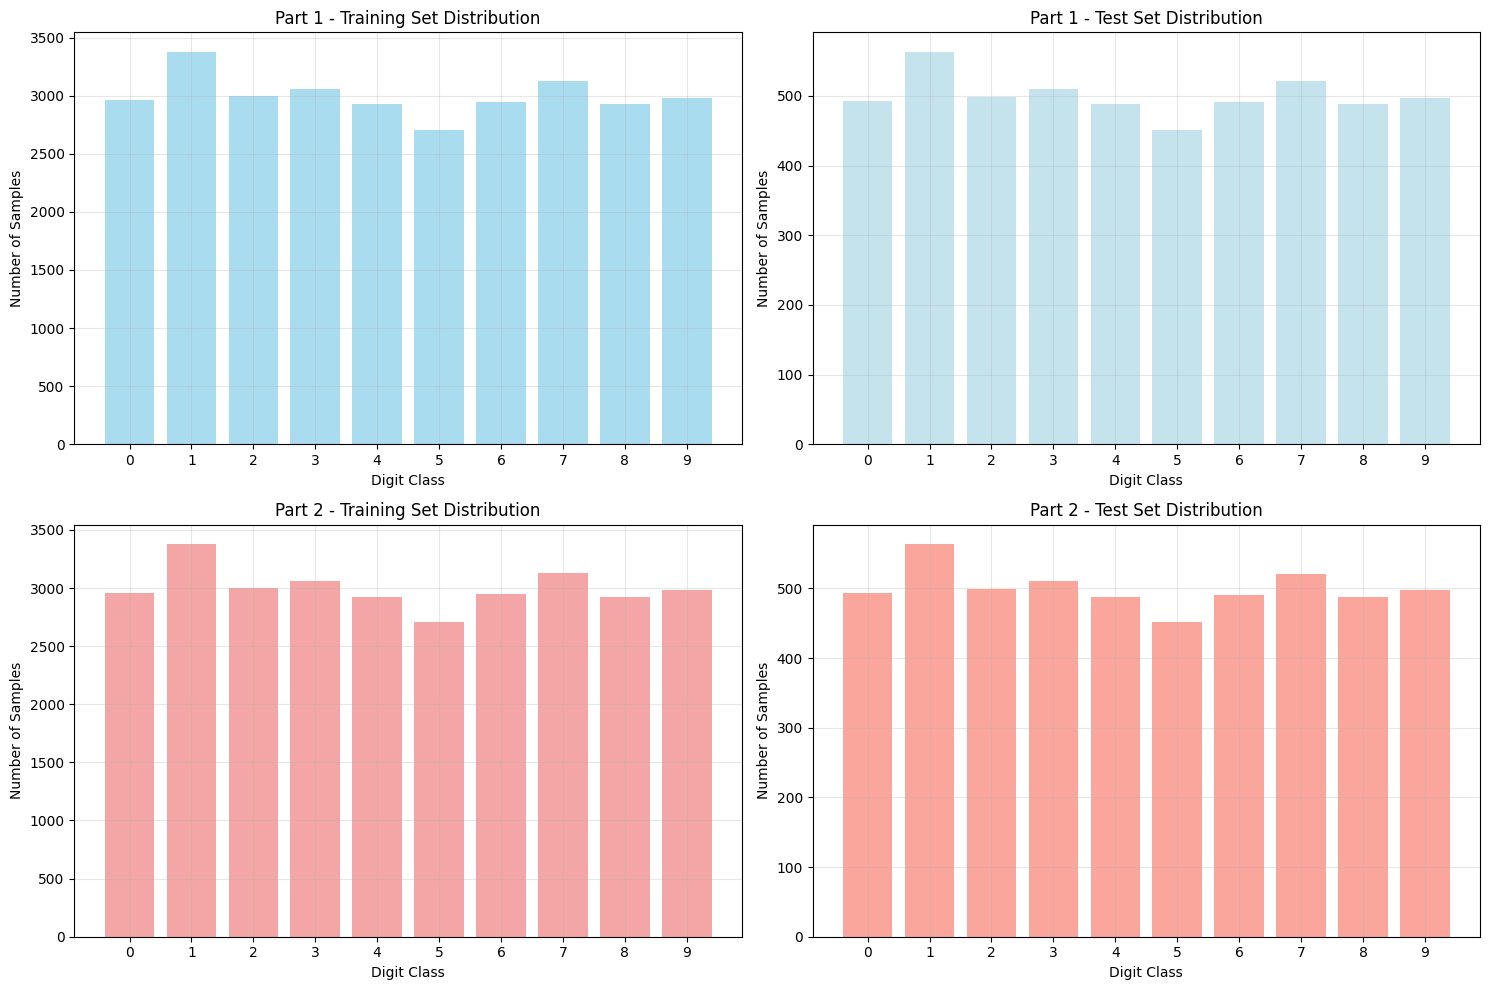

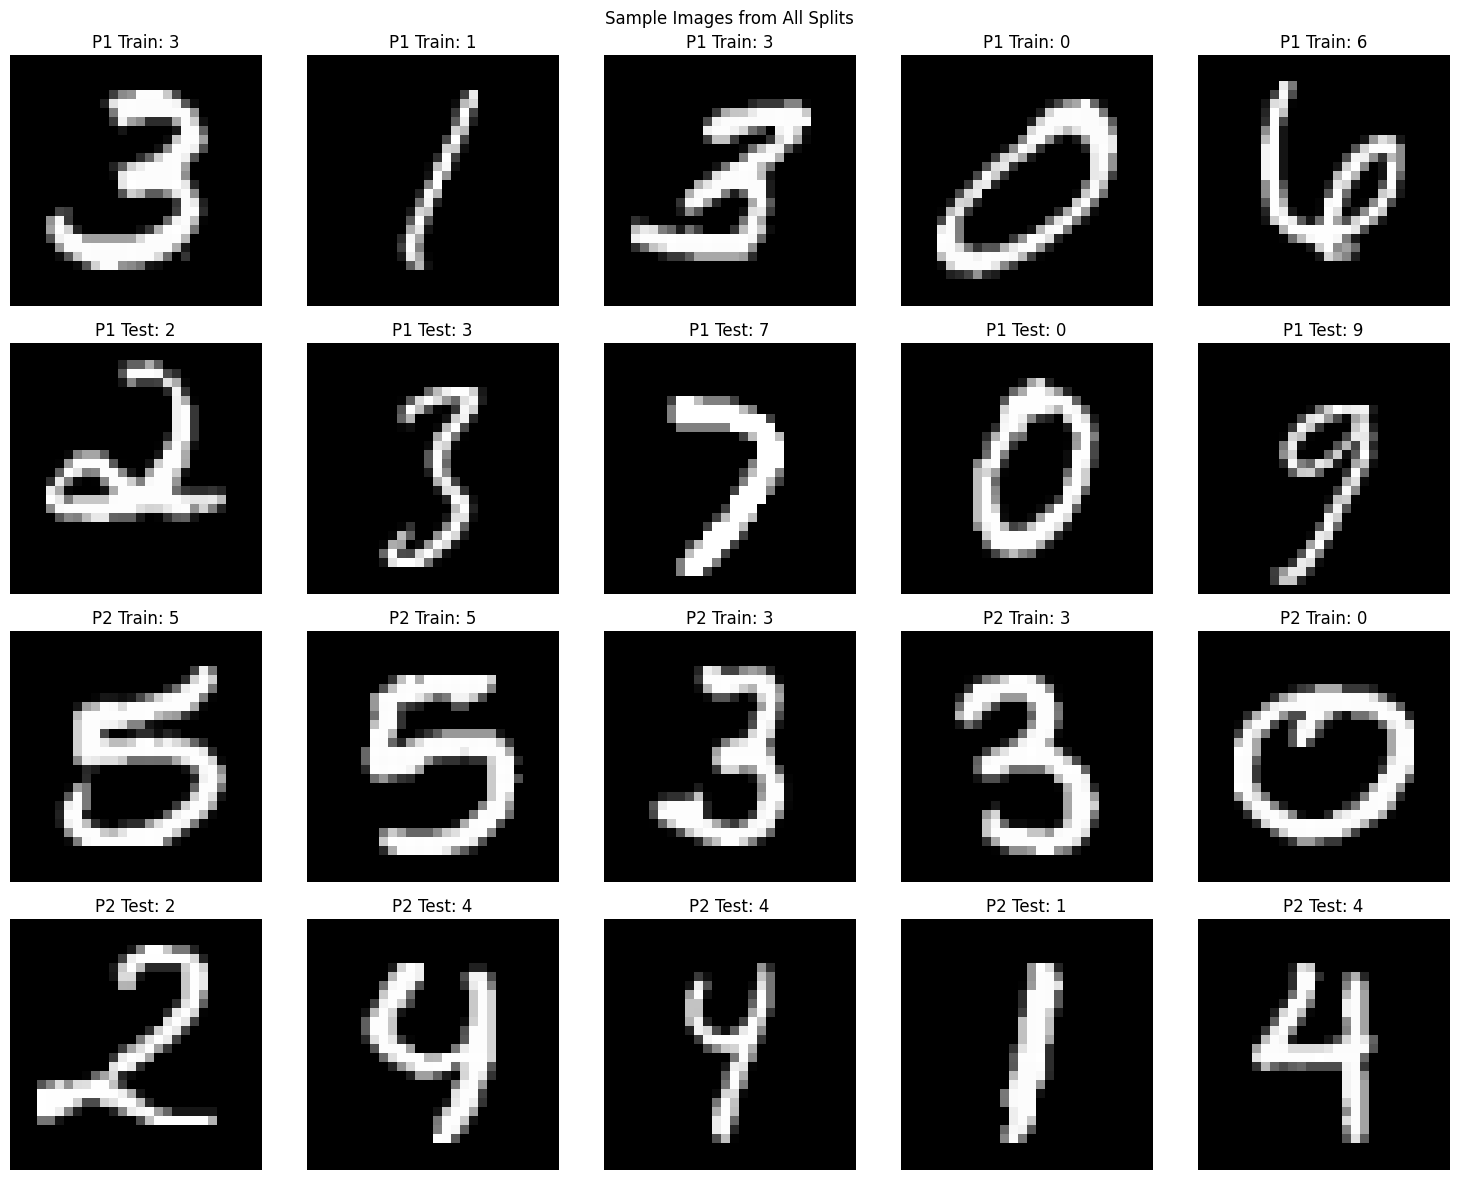

In [8]:
# Verify class distribution in all splits
def print_class_distribution(y, dataset_name):
    unique, counts = np.unique(y, return_counts=True)
    print(f"\n{dataset_name} - Class distribution:")
    for digit, count in zip(unique, counts):
        print(f"  Digit {digit}: {count} samples")
    return dict(zip(unique, counts))

# Check distributions
dist1_train = print_class_distribution(y_part1_train, "Part 1 Train")
dist1_test = print_class_distribution(y_part1_test, "Part 1 Test")
dist2_train = print_class_distribution(y_part2_train, "Part 2 Train")
dist2_test = print_class_distribution(y_part2_test, "Part 2 Test")

# Visualize class distribution comparison
plt.figure(figsize=(15, 10))

# Part 1 distributions
plt.subplot(2, 2, 1)
digits = list(range(10))
counts1_train = [dist1_train.get(d, 0) for d in digits]
plt.bar(digits, counts1_train, color='skyblue', alpha=0.7)
plt.xlabel('Digit Class')
plt.ylabel('Number of Samples')
plt.title('Part 1 - Training Set Distribution')
plt.xticks(digits)
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
counts1_test = [dist1_test.get(d, 0) for d in digits]
plt.bar(digits, counts1_test, color='lightblue', alpha=0.7)
plt.xlabel('Digit Class')
plt.ylabel('Number of Samples')
plt.title('Part 1 - Test Set Distribution')
plt.xticks(digits)
plt.grid(True, alpha=0.3)

# Part 2 distributions
plt.subplot(2, 2, 3)
counts2_train = [dist2_train.get(d, 0) for d in digits]
plt.bar(digits, counts2_train, color='lightcoral', alpha=0.7)
plt.xlabel('Digit Class')
plt.ylabel('Number of Samples')
plt.title('Part 2 - Training Set Distribution')
plt.xticks(digits)
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
counts2_test = [dist2_test.get(d, 0) for d in digits]
plt.bar(digits, counts2_test, color='salmon', alpha=0.7)
plt.xlabel('Digit Class')
plt.ylabel('Number of Samples')
plt.title('Part 2 - Test Set Distribution')
plt.xticks(digits)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Show sample images from each split
plt.figure(figsize=(15, 12))
for i in range(5):
    # Part 1 Train samples
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_part1_train[i], cmap='gray')
    plt.title(f'P1 Train: {y_part1_train[i]}')
    plt.axis('off')
    
    # Part 1 Test samples
    plt.subplot(4, 5, i + 6)
    plt.imshow(x_part1_test[i], cmap='gray')
    plt.title(f'P1 Test: {y_part1_test[i]}')
    plt.axis('off')
    
    # Part 2 Train samples
    plt.subplot(4, 5, i + 11)
    plt.imshow(x_part2_train[i], cmap='gray')
    plt.title(f'P2 Train: {y_part2_train[i]}')
    plt.axis('off')
    
    # Part 2 Test samples
    plt.subplot(4, 5, i + 16)
    plt.imshow(x_part2_test[i], cmap='gray')
    plt.title(f'P2 Test: {y_part2_test[i]}')
    plt.axis('off')

plt.suptitle('Sample Images from All Splits')
plt.tight_layout()
plt.show()

## Save Split Datasets

Save both parts as separate files that can be easily loaded in other notebooks.

In [9]:
# Create directories for saving the split datasets
import os

# Create data directory if it doesn't exist
data_dir = "mnist_split_data"
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    print(f"Created directory: {data_dir}")

# Save Part 1 (both training and test sets)
np.savez_compressed(
    os.path.join(data_dir, "mnist_part1.npz"),
    x_train=x_part1_train,
    y_train=y_part1_train,
    x_test=x_part1_test,
    y_test=y_part1_test
)

# Save Part 2 (both training and test sets)
np.savez_compressed(
    os.path.join(data_dir, "mnist_part2.npz"),
    x_train=x_part2_train,
    y_train=y_part2_train,
    x_test=x_part2_test,
    y_test=y_part2_test
)

print("✅ Dataset splitting and saving completed!")
print(f"✅ Part 1 saved to: {os.path.join(data_dir, 'mnist_part1.npz')}")
print(f"✅ Part 2 saved to: {os.path.join(data_dir, 'mnist_part2.npz')}")

# Display file sizes and contents
part1_size = os.path.getsize(os.path.join(data_dir, "mnist_part1.npz"))
part2_size = os.path.getsize(os.path.join(data_dir, "mnist_part2.npz"))

print(f"\nFile sizes:")
print(f"Part 1: {part1_size / (1024*1024):.2f} MB")
print(f"Part 2: {part2_size / (1024*1024):.2f} MB")

print(f"\nData summary:")
print(f"Part 1: {x_part1_train.shape[0]} train + {x_part1_test.shape[0]} test = {x_part1_train.shape[0] + x_part1_test.shape[0]} total")
print(f"Part 2: {x_part2_train.shape[0]} train + {x_part2_test.shape[0]} test = {x_part2_train.shape[0] + x_part2_test.shape[0]} total")

Created directory: mnist_split_data
✅ Dataset splitting and saving completed!
✅ Part 1 saved to: mnist_split_data\mnist_part1.npz
✅ Part 2 saved to: mnist_split_data\mnist_part2.npz

File sizes:
Part 1: 8.79 MB
Part 2: 8.78 MB

Data summary:
Part 1: 29999 train + 5001 test = 35000 total
Part 2: 29999 train + 5001 test = 35000 total


## How to Load the Split Datasets in Other Notebooks

Use this code in your other notebooks to load the split datasets:

In [ ]:
# Example code for loading Part 1 in another notebook:
"""
import numpy as np

# Load Part 1
data_part1 = np.load("mnist_split_data/mnist_part1.npz")
x_train = data_part1['x_train']
y_train = data_part1['y_train']
x_test = data_part1['x_test']
y_test = data_part1['y_test']

print(f"Part 1 - Train: {x_train.shape}, Test: {x_test.shape}")
"""

# Example code for loading Part 2 in another notebook:
"""
import numpy as np

# Load Part 2
data_part2 = np.load("mnist_split_data/mnist_part2.npz")
x_train = data_part2['x_train']
y_train = data_part2['y_train']
x_test = data_part2['x_test']
y_test = data_part2['y_test']

